# Data Pre-processing 

----------

Download and inspect the data from the various sources:

1. Financial Phrasebank https://huggingface.co/datasets/financial_phrasebank. Humanly annotated

2. Financial tweets topics dataset: https://huggingface.co/datasets/zeroshot/twitter-financial-news-topic/viewer/default/train?p=169. Humanly annotated

Think of any pre-processing functions (
    Converting the text to lowercase,
    removing punctuation,
    tokenizing the text,
    removing stop words and empty strings,
    lemmatizing tokens.
) that you might need to apply for downstream tasks. As always, pick a framework for data analysis and data exploration.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from datasets import load_dataset

dataset = load_dataset('financial_phrasebank', 'sentences_50agree')
df_fin_phrase = pd.DataFrame(dataset['train'])


In [6]:
writeDataToDisk("../Data/Raw/fin_phrase_bank.csv",df_fin_phrase)

In [2]:
df_tweet_topic_train = pd.read_csv('../Data/Raw/topic_train.csv')
df_tweet_topic_valid = pd.read_csv('../Data/Raw/topic_valid.csv')
df_fin_phrase = pd.read_csv('../Data/Raw/fin_phrase_bank.csv')

In [3]:
topics = {
    0 : "Analyst Update",
    1: "Fed | Central Banks",
    2: "Company | Product News",
    3: "Treasuries | Corporate Debt",
    4: "Dividend",
    5: "Earnings",
    6: "Energy | Oil",
    7: "Financials",
    8: "Currencies",
    9: "General News | Opinion",
    10: "Gold | Metals | Materials",
    11: "IPO",
    12: "Legal | Regulation",
    13: "M&A | Investments",
    14: "Macro",
    15: "Markets",
    16: "Politics",
    17: "Personnel Change",
    18: "Stock Commentary",
    19: "Stock Movement"
}

In [4]:
sentiment = {
    0: "Negative",
    1: "Neutral",
    2: "Positive"
}

In [5]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [6]:



def writeDataToDisk(output_filename, df ):
    # TO-DO
    df.to_csv(output_filename, index=False)
    

In [7]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [8]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /home/juann/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/juann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/juann/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string


In [40]:
def clean_text(text):
    # remove URLS
    text = re.sub(r'http\S+', '', text)
    # replace % with percent
    text = re.sub(r'%', ' percent', text)
    # remove punctuation at the end of words
    text = re.sub(r'[.,!?]', '', text)
    # remove special characters except fo decimal points
    text = re.sub(r'[^a-zA-Z\s.]', '', text)
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # remove leading and trailing spaces
    text = re.sub(r'^\s+|\s+?$', '', text.lower())
    return text


def remove_stopwords(text):
    words = [word for word in text if word not in stopwords.words('english')]
    tex = " ".join(words)
    return tex

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in text.split(" ")]
    tex = " ".join(words)
    return tex



def preprocess_text(text):
    text = text.lower()
    text = clean_text(text)
    text = word_tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)

    return text


df_fin_phrase['clean_text'] = df_fin_phrase['sentence'].apply(preprocess_text)

In [11]:
df_fin_phrase.columns

Index(['sentence', 'label'], dtype='object')

In [41]:

df_tweet_topic_train['clean_text'] = df_tweet_topic_train['text'].apply(preprocess_text)
df_tweet_topic_valid['clean_text'] = df_tweet_topic_valid['text'].apply(preprocess_text)

In [13]:
df_tweet_topic_valid['topic'] = df_tweet_topic_valid['label'].apply(lambda x: topics[x])
df_tweet_topic_train['topic'] = df_tweet_topic_train['label'].apply(lambda x: topics[x])
df_fin_phrase['sentiment'] = df_fin_phrase['label'].apply(lambda x: sentiment[x])

In [45]:
df_fin_phrase.head(5)

,sentence,label,clean_text,sentiment
0,"According to Gran , the company has no plans t...",1,according gran company plan move production ru...,Neutral
1,Technopolis plans to develop in stages an area...,1,technopolis plan develop stage area le square ...,Neutral
2,The international electronic industry company ...,0,international electronic industry company elco...,Negative
3,With the new production plant the company woul...,2,new production plant company would increase ca...,Positive
4,According to the company 's updated strategy f...,2,according company updated strategy year baswar...,Positive


<Axes: >

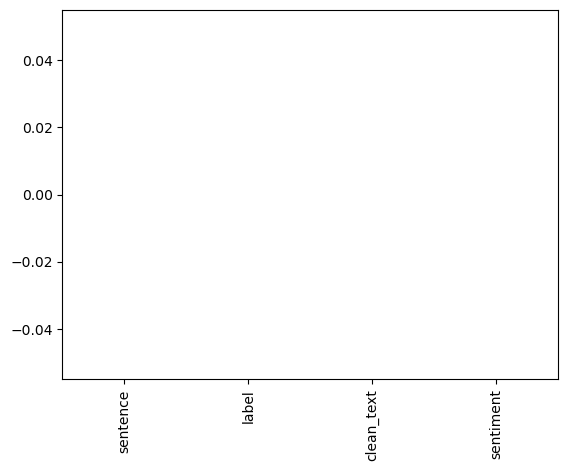

In [44]:
df_fin_phrase.isnull().sum().plot.bar()

In [42]:
writeDataToDisk("../Data/Prepared/Tweet_valid_clean.csv",df_tweet_topic_valid)
writeDataToDisk("../Data/Prepared/Tweet_train_clean.csv",df_tweet_topic_train)
writeDataToDisk("../Data/Prepared/fin_phrase_bank_clean.csv",df_fin_phrase)